###  Image Classification and Recognition using PCA and SVM

In [1]:
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py

%matplotlib inline

In [3]:
#pip install scikit-image

In [4]:
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray

In [5]:
actor1=os.listdir('robert downey jr jpg')

In [6]:
actor2=os.listdir('johnny depp jpg')

In [7]:
actor3=os.listdir('chris hemsworth jpg')

###  Reading image as matrix of numbers

In [8]:
limit=10
robert_downey_jr=[None]*limit
j=0
for i in actor1:
    if(j<limit):
        robert_downey_jr[j]=imread('C:/Users/ADMIN/cse_ai/robert downey jr jpg/'+i)
        j+=1
    else:
        break

In [9]:
johnny_depp=[None]*limit
j=0
for i in actor2:
    if(j<limit):
        johnny_depp[j]=imread('C:/Users/ADMIN/cse_ai/johnny depp jpg/'+i)
        j+=1
    else:
        break

In [10]:
chris_hemsworth=[None]*limit
j=0
for i in actor3:
    if(j<limit):
        chris_hemsworth[j]=imread('C:/Users\ADMIN/cse_ai/chris hemsworth jpg/'+i)
        j+=1
    else:
        break

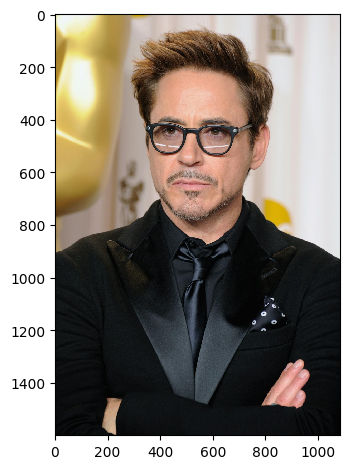

In [11]:
imshow(robert_downey_jr[3])

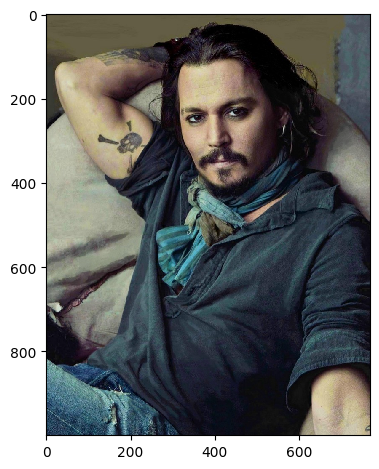

In [12]:
imshow(johnny_depp[8])

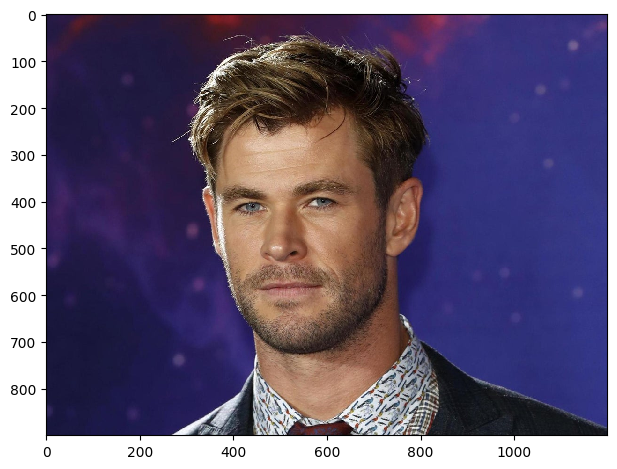

In [13]:
imshow(chris_hemsworth[3])

### Covert into greyscale

In [14]:
robert_grey=[None]*limit
j=0
for i in actor1:
    if(j<limit):
        robert_grey[j]=rgb2gray(robert_downey_jr[j])
        j+=1
    else:
        break

In [15]:
jhonny_grey=[None]*limit
j=0
for i in actor2:
    if(j<limit):
        jhonny_grey[j]=rgb2gray(johnny_depp[j])
        j+=1
    else:
        break

In [16]:
chris_grey=[None]*limit
j=0
for i in actor3:
    if(j<limit):
        chris_grey[j]=rgb2gray(chris_hemsworth[j])
        j+=1
    else:
        break

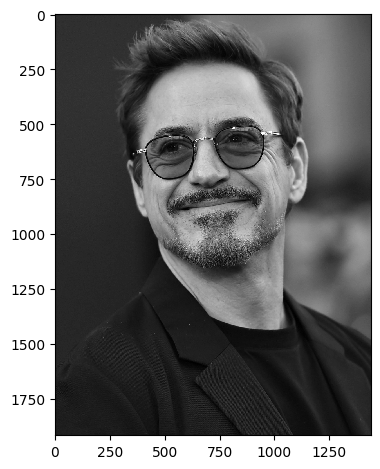

In [17]:
imshow(robert_grey[4])

###  Matrix Resizing

In [18]:
for j in range(10):
    ce=robert_grey[j]
    robert_grey[j]=resize(ce,(500,500))

In [19]:
for j in range(10):
    cm=jhonny_grey[j]
    jhonny_grey[j]=resize(cm,(500,500))

In [20]:
for j in range(10):
    th=chris_grey[j]
    chris_grey[j]=resize(th,(500,500))

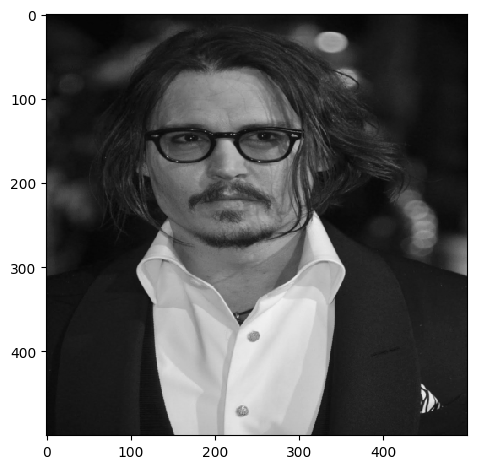

In [21]:
imshow(jhonny_grey[3])

### Flatten the image

In [22]:
image_size_robert=robert_grey[2].shape
image_size_robert

(500, 500)

In [23]:
image_size_jhonny=jhonny_grey[2].shape
image_size_jhonny

(500, 500)

In [24]:
image_size_chris=chris_grey[2].shape
image_size_chris

(500, 500)

In [26]:
flatten_size_robert=image_size_robert[0]*image_size_robert[1]
flatten_size_robert

250000

In [27]:
flatten_size_jhonny=image_size_jhonny[0]*image_size_jhonny[1]
flatten_size_jhonny

250000

In [28]:
flatten_size_chris=image_size_chris[0]*image_size_chris[1]
flatten_size_chris

250000

In [29]:
length_of_images_robert=len(robert_grey)
length_of_images_robert

10

In [30]:
length_of_images_jhonny=len(jhonny_grey)
length_of_images_jhonny

10

In [31]:
length_of_images_chris=len(chris_grey)
length_of_images_chris

10

In [32]:
for i in range(length_of_images_robert):
    robert_grey[i]=np.ndarray.flatten(robert_grey[i]).reshape(flatten_size_robert,1)

In [33]:
for i in range(length_of_images_jhonny):
    jhonny_grey[i]=np.ndarray.flatten(jhonny_grey[i]).reshape(flatten_size_jhonny,1)

In [34]:
for i in range(length_of_images_chris):
    chris_grey[i]=np.ndarray.flatten(chris_grey[i]).reshape(flatten_size_chris,1)

### Stack in the array

In [35]:
robert_grey=np.dstack(robert_grey)
robert_grey.shape

(250000, 1, 10)

In [36]:
jhonny_grey=np.dstack(jhonny_grey)
jhonny_grey.shape

(250000, 1, 10)

In [37]:
chris_grey=np.dstack(chris_grey)
chris_grey.shape

(250000, 1, 10)

In [38]:
robert_grey=np.rollaxis(robert_grey,axis=2,start=0)
robert_grey.shape

(10, 250000, 1)

In [39]:
jhonny_grey=np.rollaxis(jhonny_grey,axis=2,start=0)
jhonny_grey.shape

(10, 250000, 1)

In [40]:
chris_grey=np.rollaxis(chris_grey,axis=2,start=0)
chris_grey.shape

(10, 250000, 1)

In [41]:
robert_grey=robert_grey.reshape(length_of_images_robert,flatten_size_robert)
robert_grey.shape

(10, 250000)

In [42]:
jhonny_grey=jhonny_grey.reshape(length_of_images_jhonny,flatten_size_jhonny)
jhonny_grey.shape

(10, 250000)

In [43]:
chris_grey=chris_grey.reshape(length_of_images_chris,flatten_size_chris)
chris_grey.shape

(10, 250000)

###  Converting into DataFrames


In [44]:
robert_data=pd.DataFrame(robert_grey)
robert_data['label']='robert downey jr'
robert_data

0         1         2         3         4         5         6  \
0  0.121911  0.119881  0.124250  0.127029  0.127716  0.130351  0.130353   
1  0.619385  0.619407  0.622514  0.621051  0.614702  0.615244  0.615463   
2  0.251278  0.251278  0.251278  0.251068  0.247776  0.251068  0.251488   
3  0.883182  0.889503  0.896960  0.901476  0.907543  0.913820  0.920656   
4  0.184003  0.182202  0.180283  0.184166  0.182835  0.182573  0.179815   
5  0.019340  0.019340  0.019408  0.019900  0.019905  0.019906  0.020011   
6  0.623855  0.612450  0.607857  0.603934  0.602301  0.597489  0.589800   
7  0.573582  0.575078  0.576809  0.580534  0.580388  0.581411  0.573714   
8  0.950471  0.950470  0.950323  0.950471  0.950470  0.947143  0.946549   
9  0.093264  0.086074  0.084476  0.079871  0.081093  0.081029  0.083155   

          7         8         9  ...    249991    249992    249993    249994  \
0  0.128377  0.126181  0.124797  ...  0.062964  0.066347  0.070767  0.073590   
1  0.615463  0.615463  0.615463  ...  0.200702  0.200150  0.200563  0.200564   
2  0.254990  0.255200  0.255409  ...  0.000210  0.003712  0.003922  0.003922   
3  0.926619  0.931721  0.936167  ...  0.018834  0.015545  0.012399  0.015409   
4  0.182372  0.180266  0.182322  ...  0.172502  0.177029  0.174420  0.171487   
5  0.020058  0.019906  0.019905  ...  0.035313  0.027284  0.015668  0.030382   
6  0.588724  0.593174  0.590820  ...  0.034694  0.050546  0.019098  0.033316   
7  0.578548  0.581683  0.581882  ...  0.050661  0.039718  0.034369  0.037782   
8  0.946550  0.946760  0.948565  ...  0.135949  0.155726  0.170388  0.171165   
9  0.082927  0.092960  0.081506  ...  0.135411  0.109252  0.127879  0.117838   

     249995    249996    249997    249998    249999             label  
0  0.072680  0.075677  0.075785  0.075523  0.078074  robert downey jr  
1  0.199173  0.196091  0.194856  0.196632  0.196644  robert downey jr  
2  0.003712  0.000210  0.000000  0.000000  0.000000  robert downey jr  
3  0.015686  0.015686  0.015686  0.015686  0.015686  robert downey jr  
4  0.173080  0.175395  0.174948  0.177828  0.179544  robert downey jr  
5  0.027758  0.024695  0.020676  0.022984  0.024631  robert downey jr  
6  0.044365  0.043063  0.053714  0.035744  0.033525  robert downey jr  
7  0.034044  0.027760  0.025517  0.034129  0.026556  robert downey jr  
8  0.163596  0.163197  0.155381  0.158120  0.172897  robert downey jr  
9  0.120069  0.117988  0.110013  0.114523  0.118449  robert downey jr  

[10 rows x 250001 columns]

In [45]:
jhonny_data=pd.DataFrame(jhonny_grey)
jhonny_data['label']='jhonny depp'
jhonny_data

0         1         2         3         4         5         6  \
0  0.615442  0.622406  0.614892  0.621035  0.623269  0.625688  0.629609   
1  0.933779  0.933779  0.933779  0.933779  0.933779  0.933779  0.933779   
2  0.329040  0.328921  0.337072  0.341921  0.343815  0.348747  0.354528   
3  0.035646  0.035047  0.032519  0.034251  0.035299  0.035299  0.033185   
4  0.324226  0.332481  0.332617  0.339511  0.345924  0.346110  0.342266   
5  0.158240  0.159762  0.170625  0.170481  0.182736  0.189129  0.188482   
6  0.670121  0.671866  0.668972  0.674201  0.668292  0.641695  0.592335   
7  0.141177  0.141177  0.141177  0.142463  0.150422  0.144888  0.154855   
8  0.362920  0.362920  0.362920  0.362920  0.362920  0.362920  0.362920   
9  0.015980  0.015980  0.015980  0.014797  0.014008  0.014008  0.014008   

          7         8         9  ...    249991    249992    249993    249994  \
0  0.633121  0.633373  0.636721  ...  0.066641  0.064367  0.069084  0.066449   
1  0.933779  0.933779  0.933779  ...  0.949128  0.949326  0.944869  0.946488   
2  0.360097  0.360771  0.370706  ...  0.149590  0.142617  0.138251  0.131167   
3  0.025627  0.025553  0.025944  ...  0.093820  0.092756  0.085845  0.085758   
4  0.341559  0.336183  0.337284  ...  0.062745  0.062745  0.062745  0.062745   
5  0.199552  0.210276  0.217599  ...  0.154368  0.159719  0.165598  0.171787   
6  0.541489  0.468998  0.392606  ...  0.078809  0.075648  0.076562  0.086993   
7  0.143113  0.153842  0.143630  ...  0.007843  0.007843  0.007843  0.007843   
8  0.362920  0.362920  0.362920  ...  0.737055  0.724658  0.708110  0.685134   
9  0.014008  0.014008  0.014008  ...  0.671044  0.673632  0.686808  0.695671   

     249995    249996    249997    249998    249999        label  
0  0.070315  0.071105  0.068595  0.064926  0.061878  jhonny depp  
1  0.955068  0.959102  0.960397  0.957349  0.952889  jhonny depp  
2  0.132163  0.142276  0.134144  0.143313  0.167527  jhonny depp  
3  0.085786  0.089145  0.089898  0.089898  0.089599  jhonny depp  
4  0.062745  0.062745  0.062745  0.062745  0.062745  jhonny depp  
5  0.174041  0.188722  0.183698  0.179466  0.181332  jhonny depp  
6  0.090679  0.096374  0.111411  0.114009  0.111119  jhonny depp  
7  0.007568  0.002432  0.013993  0.017575  0.010360  jhonny depp  
8  0.689198  0.684554  0.667119  0.648500  0.661949  jhonny depp  
9  0.695906  0.696142  0.696377  0.696612  0.696691  jhonny depp  

[10 rows x 250001 columns]

In [46]:
chris_data=pd.DataFrame(chris_grey)
chris_data['label']='chris hemsworth'
chris_data

0         1         2         3         4         5         6  \
0  0.529700  0.525980  0.549694  0.559373  0.559556  0.557921  0.566515   
1  0.982945  0.985121  0.987018  0.990750  0.990750  0.990750  0.990750   
2  0.949027  0.947844  0.944618  0.949026  0.949304  0.948228  0.946755   
3  0.122705  0.122859  0.123268  0.123224  0.123343  0.126149  0.128083   
4  0.618109  0.624161  0.630267  0.632944  0.633002  0.633095  0.632999   
5  0.673369  0.670734  0.673883  0.672288  0.665275  0.667692  0.671852   
6  0.178204  0.176198  0.171180  0.159216  0.153270  0.144032  0.134660   
7  0.996541  0.996653  0.997476  0.998426  0.998678  0.999435  0.999619   
8  0.046493  0.046493  0.046493  0.046493  0.046493  0.046493  0.047957   
9  0.030807  0.030807  0.030807  0.030807  0.030807  0.030066  0.026886   

          7         8         9  ...    249991    249992    249993    249994  \
0  0.578939  0.572309  0.569124  ...  0.279424  0.253125  0.247859  0.242146   
1  0.990750  0.990750  0.990750  ...  0.037704  0.033067  0.025575  0.023853   
2  0.946798  0.945795  0.945966  ...  0.088043  0.087893  0.111038  0.123770   
3  0.129677  0.128875  0.128997  ...  0.095006  0.110285  0.112464  0.114741   
4  0.634361  0.638878  0.639015  ...  0.471030  0.463130  0.476543  0.520636   
5  0.671037  0.669783  0.666275  ...  0.607723  0.603979  0.607023  0.607408   
6  0.135891  0.147527  0.161199  ...  0.276007  0.276006  0.277180  0.277678   
7  1.000000  0.998667  0.997267  ...  0.463471  0.480009  0.506468  0.507979   
8  0.048465  0.048465  0.048465  ...  0.063261  0.059314  0.058538  0.057913   
9  0.026886  0.026886  0.026886  ...  0.490209  0.470249  0.468422  0.461179   

     249995    249996    249997    249998    249999            label  
0  0.224353  0.223286  0.226052  0.228274  0.212154  chris hemsworth  
1  0.029085  0.020827  0.021002  0.028118  0.023927  chris hemsworth  
2  0.108807  0.100723  0.110275  0.098988  0.080340  chris hemsworth  
3  0.108195  0.094125  0.098151  0.094751  0.090690  chris hemsworth  
4  0.569558  0.571381  0.517462  0.486294  0.489326  chris hemsworth  
5  0.610263  0.617419  0.632822  0.641492  0.646948  chris hemsworth  
6  0.276343  0.278415  0.276346  0.284314  0.283576  chris hemsworth  
7  0.507832  0.504732  0.475519  0.454443  0.458320  chris hemsworth  
8  0.061583  0.061936  0.057303  0.057708  0.059285  chris hemsworth  
9  0.454578  0.448147  0.445080  0.408246  0.394015  chris hemsworth  

[10 rows x 250001 columns]

###  DataFrame Concatination

In [47]:
actor_1=pd.concat([robert_data,jhonny_data])

In [48]:
actor=pd.concat([chris_data,actor_1])
actor

0         1         2         3         4         5         6  \
0  0.529700  0.525980  0.549694  0.559373  0.559556  0.557921  0.566515   
1  0.982945  0.985121  0.987018  0.990750  0.990750  0.990750  0.990750   
2  0.949027  0.947844  0.944618  0.949026  0.949304  0.948228  0.946755   
3  0.122705  0.122859  0.123268  0.123224  0.123343  0.126149  0.128083   
4  0.618109  0.624161  0.630267  0.632944  0.633002  0.633095  0.632999   
5  0.673369  0.670734  0.673883  0.672288  0.665275  0.667692  0.671852   
6  0.178204  0.176198  0.171180  0.159216  0.153270  0.144032  0.134660   
7  0.996541  0.996653  0.997476  0.998426  0.998678  0.999435  0.999619   
8  0.046493  0.046493  0.046493  0.046493  0.046493  0.046493  0.047957   
9  0.030807  0.030807  0.030807  0.030807  0.030807  0.030066  0.026886   
0  0.121911  0.119881  0.124250  0.127029  0.127716  0.130351  0.130353   
1  0.619385  0.619407  0.622514  0.621051  0.614702  0.615244  0.615463   
2  0.251278  0.251278  0.251278  0.251068  0.247776  0.251068  0.251488   
3  0.883182  0.889503  0.896960  0.901476  0.907543  0.913820  0.920656   
4  0.184003  0.182202  0.180283  0.184166  0.182835  0.182573  0.179815   
5  0.019340  0.019340  0.019408  0.019900  0.019905  0.019906  0.020011   
6  0.623855  0.612450  0.607857  0.603934  0.602301  0.597489  0.589800   
7  0.573582  0.575078  0.576809  0.580534  0.580388  0.581411  0.573714   
8  0.950471  0.950470  0.950323  0.950471  0.950470  0.947143  0.946549   
9  0.093264  0.086074  0.084476  0.079871  0.081093  0.081029  0.083155   
0  0.615442  0.622406  0.614892  0.621035  0.623269  0.625688  0.629609   
1  0.933779  0.933779  0.933779  0.933779  0.933779  0.933779  0.933779   
2  0.329040  0.328921  0.337072  0.341921  0.343815  0.348747  0.354528   
3  0.035646  0.035047  0.032519  0.034251  0.035299  0.035299  0.033185   
4  0.324226  0.332481  0.332617  0.339511  0.345924  0.346110  0.342266   
5  0.158240  0.159762  0.170625  0.170481  0.182736  0.189129  0.188482   
6  0.670121  0.671866  0.668972  0.674201  0.668292  0.641695  0.592335   
7  0.141177  0.141177  0.141177  0.142463  0.150422  0.144888  0.154855   
8  0.362920  0.362920  0.362920  0.362920  0.362920  0.362920  0.362920   
9  0.015980  0.015980  0.015980  0.014797  0.014008  0.014008  0.014008   

          7         8         9  ...    249991    249992    249993    249994  \
0  0.578939  0.572309  0.569124  ...  0.279424  0.253125  0.247859  0.242146   
1  0.990750  0.990750  0.990750  ...  0.037704  0.033067  0.025575  0.023853   
2  0.946798  0.945795  0.945966  ...  0.088043  0.087893  0.111038  0.123770   
3  0.129677  0.128875  0.128997  ...  0.095006  0.110285  0.112464  0.114741   
4  0.634361  0.638878  0.639015  ...  0.471030  0.463130  0.476543  0.520636   
5  0.671037  0.669783  0.666275  ...  0.607723  0.603979  0.607023  0.607408   
6  0.135891  0.147527  0.161199  ...  0.276007  0.276006  0.277180  0.277678   
7  1.000000  0.998667  0.997267  ...  0.463471  0.480009  0.506468  0.507979   
8  0.048465  0.048465  0.048465  ...  0.063261  0.059314  0.058538  0.057913   
9  0.026886  0.026886  0.026886  ...  0.490209  0.470249  0.468422  0.461179   
0  0.128377  0.126181  0.124797  ...  0.062964  0.066347  0.070767  0.073590   
1  0.615463  0.615463  0.615463  ...  0.200702  0.200150  0.200563  0.200564   
2  0.254990  0.255200  0.255409  ...  0.000210  0.003712  0.003922  0.003922   
3  0.926619  0.931721  0.936167  ...  0.018834  0.015545  0.012399  0.015409   
4  0.182372  0.180266  0.182322  ...  0.172502  0.177029  0.174420  0.171487   
5  0.020058  0.019906  0.019905  ...  0.035313  0.027284  0.015668  0.030382   
6  0.588724  0.593174  0.590820  ...  0.034694  0.050546  0.019098  0.033316   
7  0.578548  0.581683  0.581882  ...  0.050661  0.039718  0.034369  0.037782   
8  0.946550  0.946760  0.948565  ...  0.135949  0.155726  0.170388  0.171165   
9  0.082927  0.092960  0.081506  ...  0.135411  0.109252  0.127879  0.117838   
0  0

In [49]:
from sklearn.utils import shuffle

In [50]:
hollywood_indexed=shuffle(actor).reset_index()
hollywood_indexed

index         0         1         2         3         4         5  \
0       5  0.673369  0.670734  0.673883  0.672288  0.665275  0.667692   
1       2  0.329040  0.328921  0.337072  0.341921  0.343815  0.348747   
2       9  0.015980  0.015980  0.015980  0.014797  0.014008  0.014008   
3       9  0.030807  0.030807  0.030807  0.030807  0.030807  0.030066   
4       0  0.121911  0.119881  0.124250  0.127029  0.127716  0.130351   
5       6  0.178204  0.176198  0.171180  0.159216  0.153270  0.144032   
6       5  0.158240  0.159762  0.170625  0.170481  0.182736  0.189129   
7       4  0.618109  0.624161  0.630267  0.632944  0.633002  0.633095   
8       7  0.573582  0.575078  0.576809  0.580534  0.580388  0.581411   
9       1  0.982945  0.985121  0.987018  0.990750  0.990750  0.990750   
10      1  0.619385  0.619407  0.622514  0.621051  0.614702  0.615244   
11      7  0.141177  0.141177  0.141177  0.142463  0.150422  0.144888   
12      8  0.950471  0.950470  0.950323  0.950471  0.950470  0.947143   
13      3  0.035646  0.035047  0.032519  0.034251  0.035299  0.035299   
14      1  0.933779  0.933779  0.933779  0.933779  0.933779  0.933779   
15      6  0.670121  0.671866  0.668972  0.674201  0.668292  0.641695   
16      8  0.362920  0.362920  0.362920  0.362920  0.362920  0.362920   
17      4  0.324226  0.332481  0.332617  0.339511  0.345924  0.346110   
18      0  0.615442  0.622406  0.614892  0.621035  0.623269  0.625688   
19      3  0.883182  0.889503  0.896960  0.901476  0.907543  0.913820   
20      4  0.184003  0.182202  0.180283  0.184166  0.182835  0.182573   
21      9  0.093264  0.086074  0.084476  0.079871  0.081093  0.081029   
22      7  0.996541  0.996653  0.997476  0.998426  0.998678  0.999435   
23      6  0.623855  0.612450  0.607857  0.603934  0.602301  0.597489   
24      5  0.019340  0.019340  0.019408  0.019900  0.019905  0.019906   
25      3  0.122705  0.122859  0.123268  0.123224  0.123343  0.126149   
26      8  0.046493  0.046493  0.046493  0.046493  0.046493  0.046493   
27      2  0.251278  0.251278  0.251278  0.251068  0.247776  0.251068   
28      0  0.529700  0.525980  0.549694  0.559373  0.559556  0.557921   
29      2  0.949027  0.947844  0.944618  0.949026  0.949304  0.948228   

           6         7         8  ...    249991    249992    249993    249994  \
0   0.671852  0.671037  0.669783  ...  0.607723  0.603979  0.607023  0.607408   
1   0.354528  0.360097  0.360771  ...  0.149590  0.142617  0.138251  0.131167   
2   0.014008  0.014008  0.014008  ...  0.671044  0.673632  0.686808  0.695671   
3   0.026886  0.026886  0.026886  ...  0.490209  0.470249  0.468422  0.461179   
4   0.130353  0.128377  0.126181  ...  0.062964  0.066347  0.070767  0.073590   
5   0.134660  0.135891  0.147527  ...  0.276007  0.276006  0.277180  0.277678   
6   0.188482  0.199552  0.210276  ...  0.154368  0.159719  0.165598  0.171787   
7   0.632999  0.634361  0.638878  ...  0.471030  0.463130  0.476543  0.520636   
8   0.573714  0.578548  0.581683  ...  0.050661  0.039718  0.034369  0.037782   
9   0.990750  0.990750  0.990750  ...  0.037704  0.033067  0.025575  0.023853   
10  0.615463  0.615463  0.615463  ...  0.200702  0.200150  0.200563  0.200564   
11  0.154855  0.143113  0.153842  ...  0.007843  0.007843  0.007843  0.007843   
12  0.946549  0.946550  0.946760  ...  0.135949  0.155726  0.170388  0.171165   
13  0.033185  0.025627  0.025553  ...  0.093820  0.092756  0.085845  0.085758   
14  0.933779  0.933779  0.933779  ...  0.949128  0.949326  0.944869  0.946488   
15  0.592335  0.541489  0.468998  ...  0.078809  0.075648  0.076562  0.086993   
16  0.362920  0.362920  0.362920  ...  0.737055  0.724658  0.708110  0.685134   
17  0.342266  0.341559  0.336183  ...  0.062745  0.062745  0.062745  0.062745   
18  0.629609  0.633121  0.633373  ...  0.066641  0.064367  0.069084  0.066449   
19  0.920656  0.926619  0.931721  ...  0.018834  0.015545  0.012399  0.015409   
20  0.179815  0.182372  0.180266  ...  

In [51]:
hollywood_indexed=hollywood_indexed.drop(['index'],axis=1)
hollywood_indexed

0         1         2         3         4         5         6  \
0   0.673369  0.670734  0.673883  0.672288  0.665275  0.667692  0.671852   
1   0.329040  0.328921  0.337072  0.341921  0.343815  0.348747  0.354528   
2   0.015980  0.015980  0.015980  0.014797  0.014008  0.014008  0.014008   
3   0.030807  0.030807  0.030807  0.030807  0.030807  0.030066  0.026886   
4   0.121911  0.119881  0.124250  0.127029  0.127716  0.130351  0.130353   
5   0.178204  0.176198  0.171180  0.159216  0.153270  0.144032  0.134660   
6   0.158240  0.159762  0.170625  0.170481  0.182736  0.189129  0.188482   
7   0.618109  0.624161  0.630267  0.632944  0.633002  0.633095  0.632999   
8   0.573582  0.575078  0.576809  0.580534  0.580388  0.581411  0.573714   
9   0.982945  0.985121  0.987018  0.990750  0.990750  0.990750  0.990750   
10  0.619385  0.619407  0.622514  0.621051  0.614702  0.615244  0.615463   
11  0.141177  0.141177  0.141177  0.142463  0.150422  0.144888  0.154855   
12  0.950471  0.950470  0.950323  0.950471  0.950470  0.947143  0.946549   
13  0.035646  0.035047  0.032519  0.034251  0.035299  0.035299  0.033185   
14  0.933779  0.933779  0.933779  0.933779  0.933779  0.933779  0.933779   
15  0.670121  0.671866  0.668972  0.674201  0.668292  0.641695  0.592335   
16  0.362920  0.362920  0.362920  0.362920  0.362920  0.362920  0.362920   
17  0.324226  0.332481  0.332617  0.339511  0.345924  0.346110  0.342266   
18  0.615442  0.622406  0.614892  0.621035  0.623269  0.625688  0.629609   
19  0.883182  0.889503  0.896960  0.901476  0.907543  0.913820  0.920656   
20  0.184003  0.182202  0.180283  0.184166  0.182835  0.182573  0.179815   
21  0.093264  0.086074  0.084476  0.079871  0.081093  0.081029  0.083155   
22  0.996541  0.996653  0.997476  0.998426  0.998678  0.999435  0.999619   
23  0.623855  0.612450  0.607857  0.603934  0.602301  0.597489  0.589800   
24  0.019340  0.019340  0.019408  0.019900  0.019905  0.019906  0.020011   
25  0.122705  0.122859  0.123268  0.123224  0.123343  0.126149  0.128083   
26  0.046493  0.046493  0.046493  0.046493  0.046493  0.046493  0.047957   
27  0.251278  0.251278  0.251278  0.251068  0.247776  0.251068  0.251488   
28  0.529700  0.525980  0.549694  0.559373  0.559556  0.557921  0.566515   
29  0.949027  0.947844  0.944618  0.949026  0.949304  0.948228  0.946755   

           7         8         9  ...    249991    249992    249993    249994  \
0   0.671037  0.669783  0.666275  ...  0.607723  0.603979  0.607023  0.607408   
1   0.360097  0.360771  0.370706  ...  0.149590  0.142617  0.138251  0.131167   
2   0.014008  0.014008  0.014008  ...  0.671044  0.673632  0.686808  0.695671   
3   0.026886  0.026886  0.026886  ...  0.490209  0.470249  0.468422  0.461179   
4   0.128377  0.126181  0.124797  ...  0.062964  0.066347  0.070767  0.073590   
5   0.135891  0.147527  0.161199  ...  0.276007  0.276006  0.277180  0.277678   
6   0.199552  0.210276  0.217599  ...  0.154368  0.159719  0.165598  0.171787   
7   0.634361  0.638878  0.639015  ...  0.471030  0.463130  0.476543  0.520636   
8   0.578548  0.581683  0.581882  ...  0.050661  0.039718  0.034369  0.037782   
9   0.990750  0.990750  0.990750  ...  0.037704  0.033067  0.025575  0.023853   
10  0.615463  0.615463  0.615463  ...  0.200702  0.200150  0.200563  0.200564   
11  0.143113  0.153842  0.143630  ...  0.007843  0.007843  0.007843  0.007843   
12  0.946550  0.946760  0.948565  ...  0.135949  0.155726  0.170388  0.171165   
13  0.025627  0.025553  0.025944  ...  0.093820  0.092756  0.085845  0.085758   
14  0.933779  0.933779  0.933779  ...  0.949128  0.949326  0.944869  0.946488   
15  0.541489  0.468998  0.392606  ...  0.078809  0.075648  0.076562  0.086993   
16  0.362920  0.362920  0.362920  ...  0.737055  0.724658  0.708110  0.685134   
17  0.341559  0.336183  0.337284  ...  0.062745  0.062745  0.062745  0.062745   
18  0.633121  0.633373  0.636721  ...  0.066641  0.064367  0.069084  0.066449   
19  0.926619  0.931721  0.936167  

In [52]:
hollywood_indexed.to_csv('Actors.csv')

In [53]:
x=hollywood_indexed.values[:,:-1]

In [54]:
y=hollywood_indexed.values[:,-1]

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)

In [57]:
x_train.shape

(15, 250000)

In [58]:
x_test.shape

(15, 250000)

In [59]:
y_train.shape

(15,)

In [60]:
y_test.shape

(15,)

In [61]:
from sklearn import decomposition

In [62]:
pca=decomposition.PCA(n_components=15,whiten=True,random_state=1)

In [63]:
pca.fit(x_train)

PCA(n_components=15, random_state=1, whiten=True)

In [64]:
x_train_pca=pca.transform(x_train)
x_test_pca=pca.transform(x_test)

In [65]:
x_train_pca.shape

(15, 15)

In [66]:
x_test_pca.shape

(15, 15)

In [67]:
eigen=(np.reshape(x[10],(500,500)).astype(np.float64))

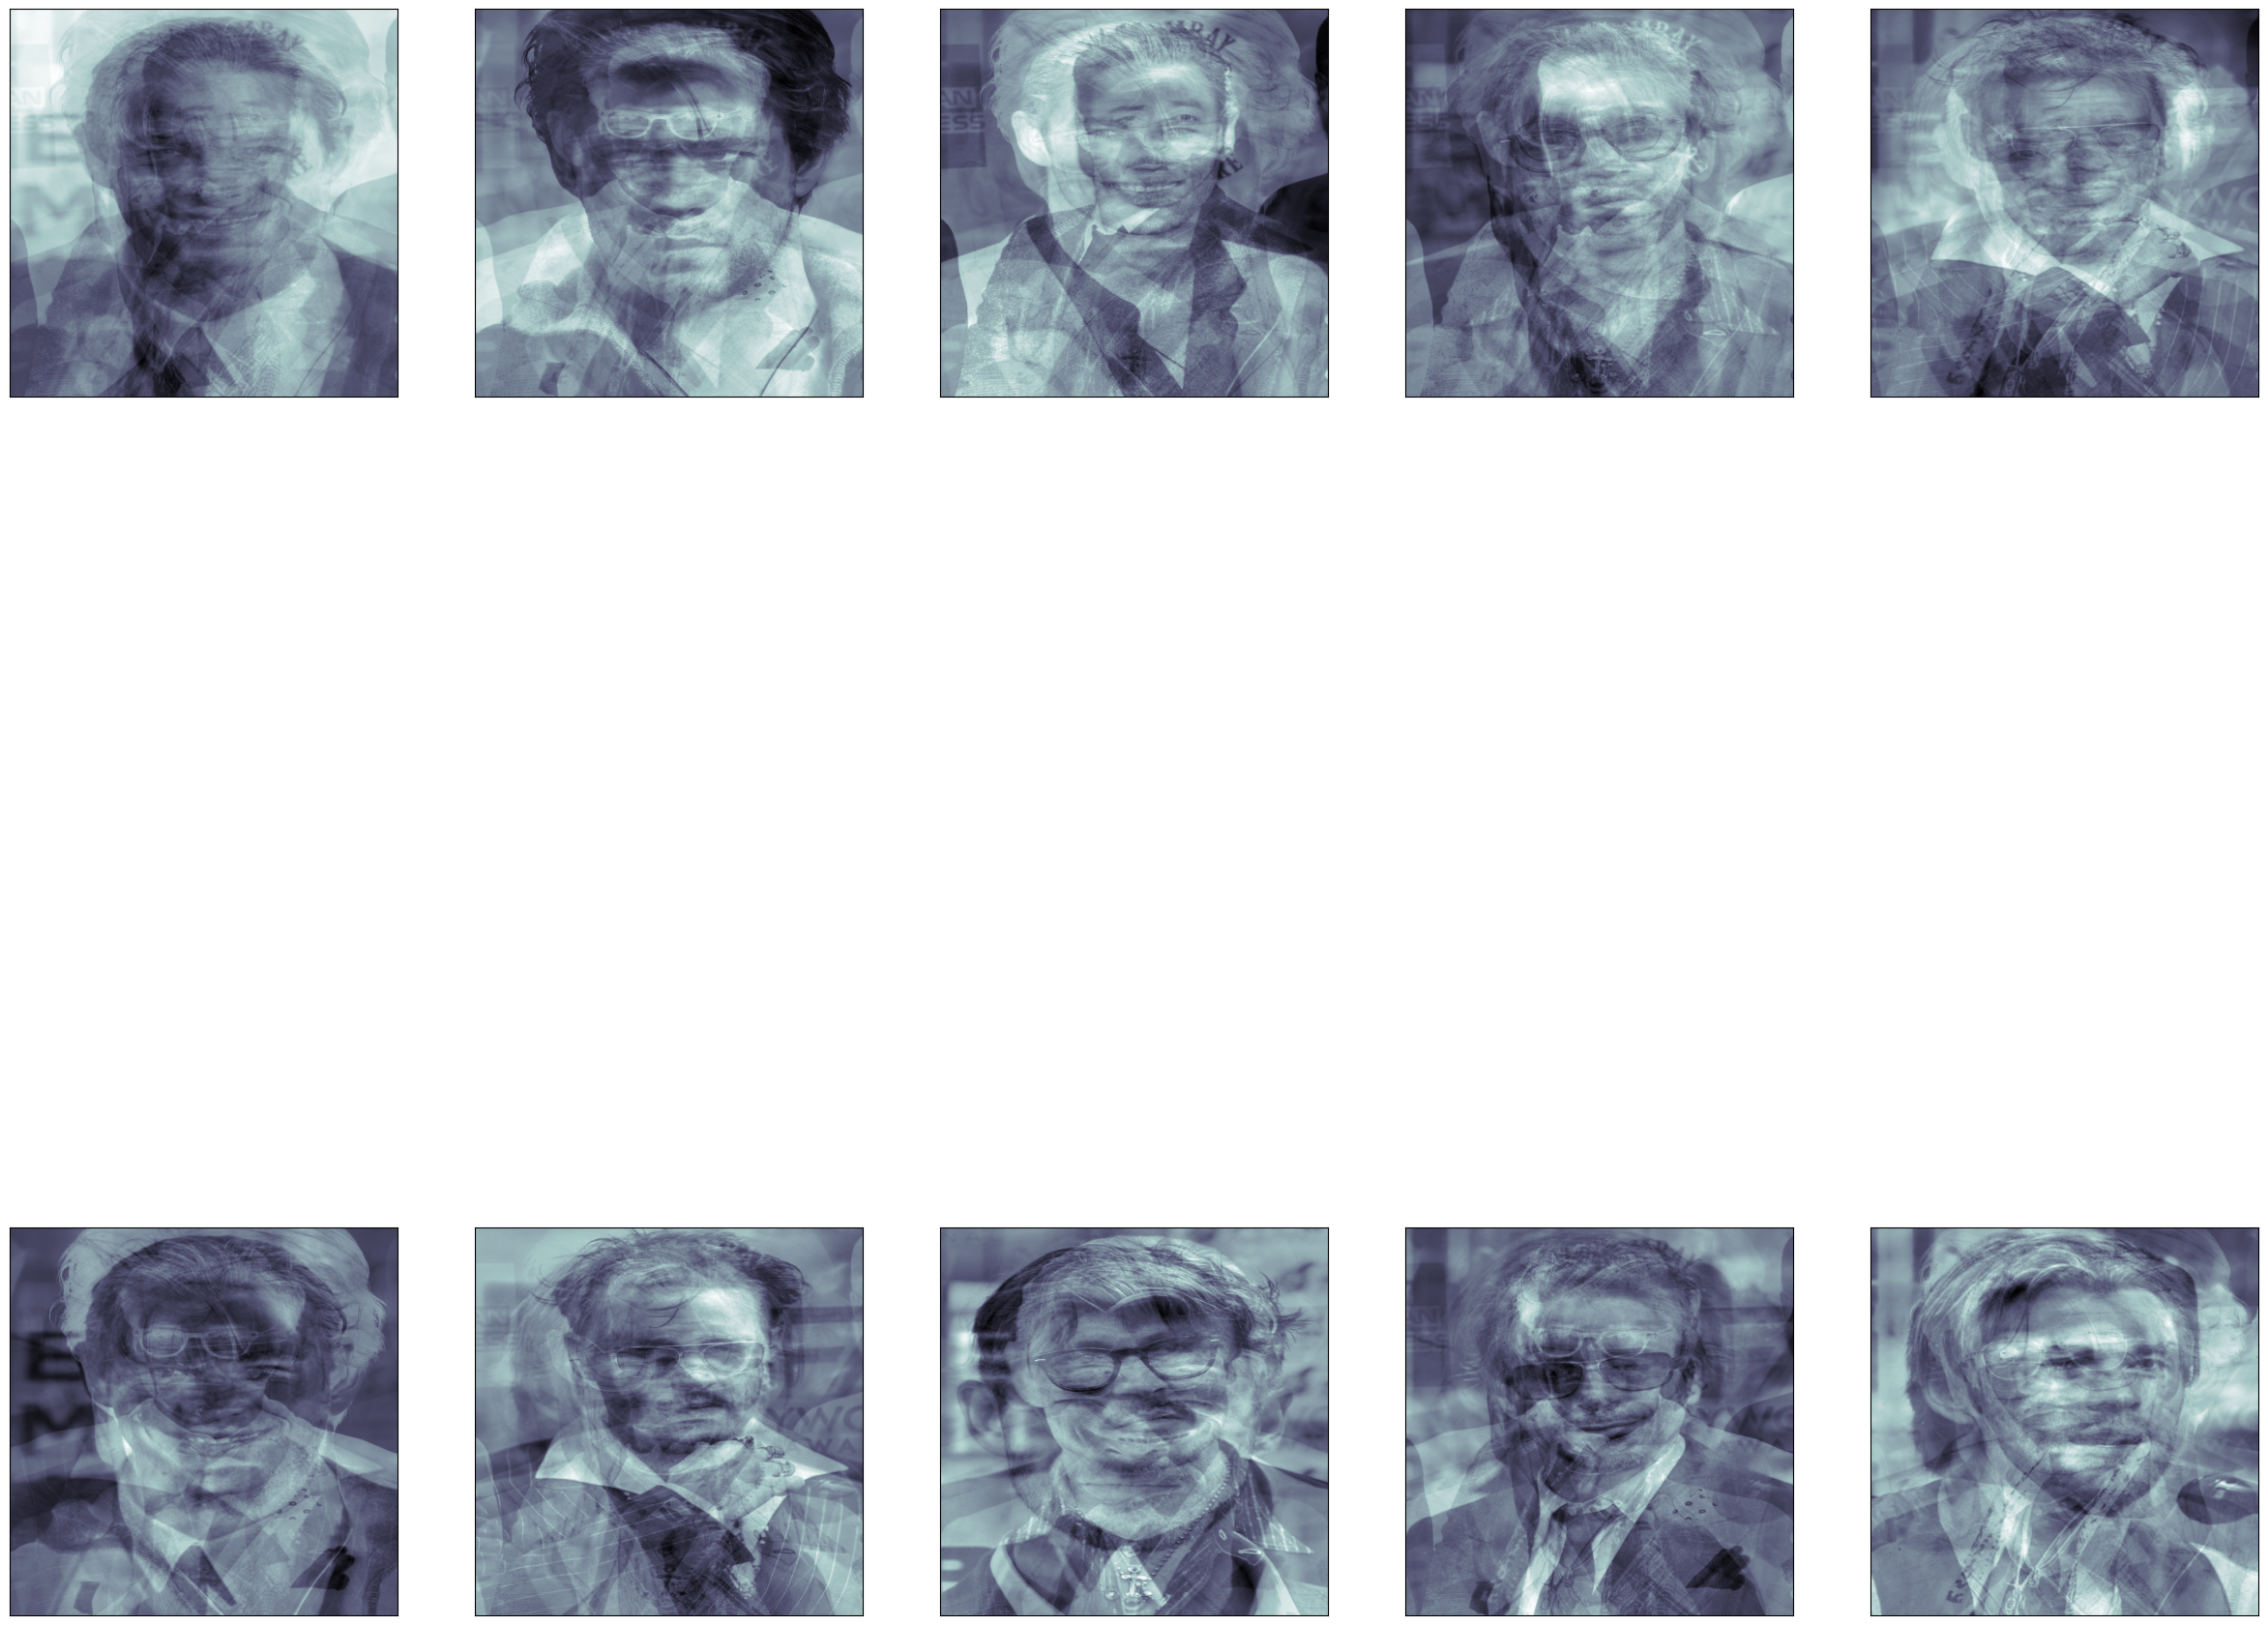

In [68]:
fig=py.figure(figsize=(30,30))
for i in range(10):
    ax=fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(pca.components_[i].reshape(eigen.shape),cmap=py.cm.bone)

In [69]:
from sklearn import svm

In [70]:
clf=svm.SVC(C=2,gamma=0.006,kernel='rbf')
clf.fit(x_train_pca,y_train)

SVC(C=2, gamma=0.006)

In [71]:
y_pred=clf.predict(x_test_pca)
y_pred

array(['chris hemsworth', 'chris hemsworth', 'chris hemsworth',
       'chris hemsworth', 'chris hemsworth', 'chris hemsworth',
       'chris hemsworth', 'chris hemsworth', 'chris hemsworth',
       'chris hemsworth', 'chris hemsworth', 'chris hemsworth',
       'chris hemsworth', 'chris hemsworth', 'chris hemsworth'],
      dtype=object)

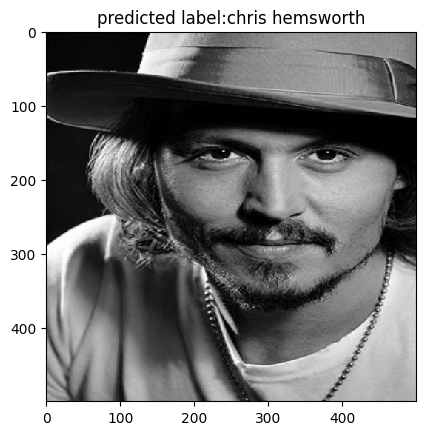

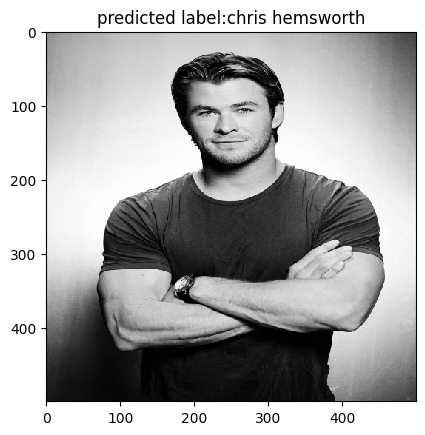

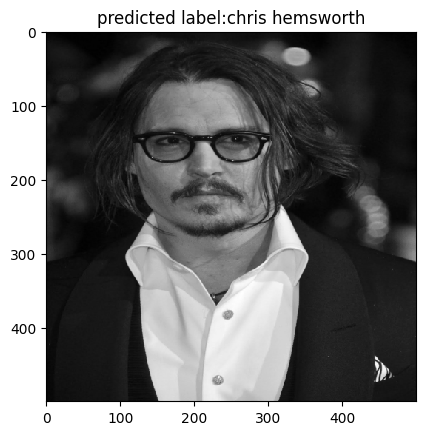

In [75]:
for i in(np.random.randint(0,3,3)):
    predicted_images=(np.reshape(x_test[i],(500,500)).astype(np.float64))
    py.title('predicted label:{0}'.format(y_pred[i]))
    py.imshow(predicted_images,interpolation='nearest',cmap='gray')
    py.show()

In [77]:
from sklearn import metrics

In [ ]:
accuracy=